In [1]:
import csoundengine as ce

In [2]:
e = ce.Engine()




--Csound version 6.19 (double samples) Jan 13 2024
[commit: c53556fbbb69d14554a4a4bd91efa441a1701d70]
libsndfile-1.2.0
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


In [3]:
e.testAudio()


Testaudio: pink noise mode
Channel: 1 / 2


25.0002

Channel: 2 / 2
Channel: 1 / 2
Channel: 2 / 2


In [4]:
s = ce.Session(engine=e, dynamicArgsSlots=20000, dynamicArgsPerInstr=8)

In [5]:
s.defInstr('foo0', r'''
|imidi=60, iamp=0.1|
outch 1, oscili:a(iamp, mtof:k(imidi))
''')

Instr(foo0, imidi:5=60, iamp:6=0.1)

In [6]:
sy = s.sched('foo0', imidi=61, iamp=0.2)
sy

Button(description='Stop', style=ButtonStyle())

Output()

Synth(𝍪 foo0=501.0002 start=10.123 dur=-1.000 p4=61 imidi=0.2)

In [7]:
s.defInstr('foo', r'''
|kmidi=60, kamp=0.1|
outch 1, vco2:a(kamp, mtof:k(kmidi))
''')

Instr(foo, kmidi:5=60, kamp:6=0.1)

In [8]:
for j in range(10):
    for i in range(100):
        sy = s.sched('foo', dur=0.01, kmidi=36+i*0.1, delay=j*0.5, kamp=0.01)
        

In [9]:
s.engine.extraLatency = 0.2
J = 10
N = 80
delayfact = .5
    
with s.engine.lockedClock(): 
    for j in range(J):
        for i in range(N): 
            sy = s.sched('foo', dur=0.01, kmidi=24+i*0.25, delay=j*delayfact, kamp=0.6/N)
        


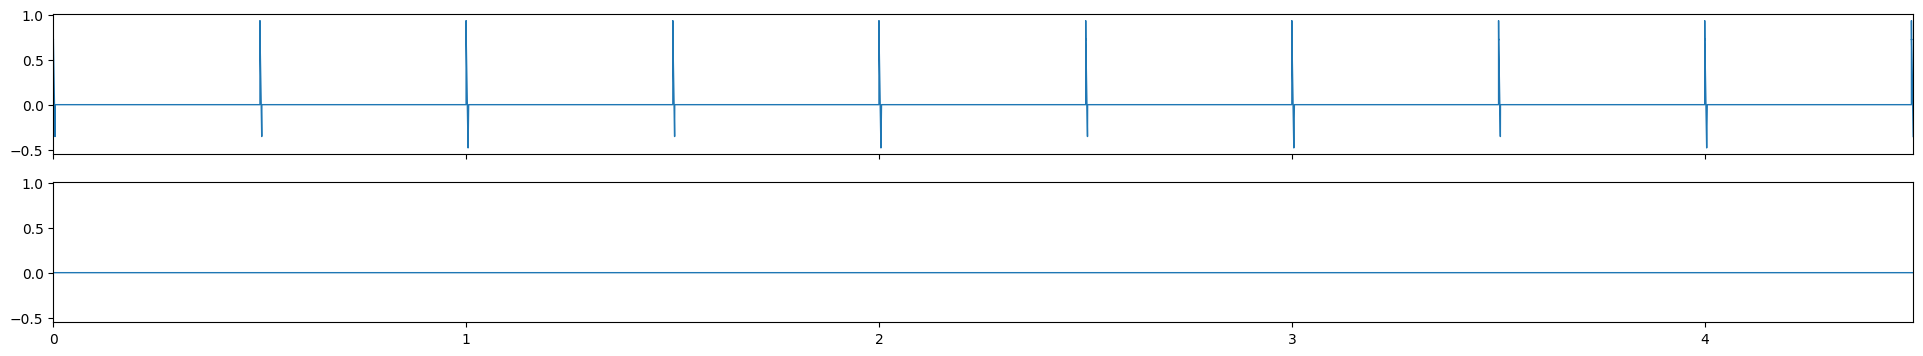

In [10]:
with s.rendering(verbose=False) as r:
    for j in range(J):
        for i in range(N):
            sy = r.sched('foo', dur=0.005, kmidi=48+i*0.1, delay=j*delayfact, kamp=0.01)
r


In [11]:
s.defInstr('ifoo', r'''
|imidi=60, iamp=0.1|
outch 1, oscili:a(iamp, mtof(imidi))
''')

Instr(ifoo, imidi:5=60, iamp:6=0.1)

In [15]:
s.engine.extraLatency = 0.5
with s.engine.lockedClock():
    for j in range(10):
        for i in range(80):
            sy = s.sched('ifoo', dur=0.01, imidi=36+i*0.1, delay=j*0.5, iamp=0.01)
        

RuntimeError: Session blocked during rendering

In [14]:
with s.rendering(verbose=False) as r:
    for j in range(10):
        for i in range(80):
            sy = s.sched('ifoo', dur=0.005, imidi=36+i*0.1, delay=j*0.5, iamp=0.01)
r
# r.writeCsd("~/tmp/impulses.csd")

RenderError: No score to render (start: 0.0, end: 0.0)

In [13]:
r.renderedJobs[-1].openOutfile()

QSocketNotifier: Can only be used with threads started with QThread
kf.service.services: KApplicationTrader: mimeType "x-scheme-handler/file" not found
Gtk-Message: 11:15:45.716: Failed to load module "appmenu-gtk-module"
QSocketNotifier: Can only be used with threads started with QThread
